In [1]:
import pandas as pd
import numpy as np
import scanpy as sc

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
import os
import pathlib as pl

In [97]:
from tqdm.notebook import tqdm

In [119]:
def pretty_ax(ax: plt.Axes, linew: int = 1, hideticks: bool=False):
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    for axis in ["bottom", "left"]:
        ax.spines[axis].set_linewidth(linew)
    if hideticks:
        ax.set_xticks([])
        ax.set_yticks([])

# General info

In [74]:
meta = pd.read_csv("/add/path/here/10498240/final_master.tsv",sep="\t").set_index("cell_id")

The following file was provided by the author of the paper; another way of assigning clones is to follow these indications: 
"The letter clone assignments are based on the node IDs in increasing order, so you can map them accordingly. For example, if there are 3 nodes: nodes 1, 164, and 294, then node_1 is assigned to clone A, node_164 to clone B, and node_294 to clone C."

In [77]:
# provided file
scrna_clone_labels = pd.read_csv("/add/path/here/clonelabel_RNA.tsv",sep="\t").set_index("cell_id")

# SA039

In [182]:
patient = "SA039"

resdir = pl.Path(f"/add/path/here/sigs_june2022/scRNA/count_matrices/{patient}")

plot_df = []
for sample in tqdm(resdir.iterdir()):
    if sample.stem==".DS_Store":
        continue
    counts = sc.read_10x_mtx(sample)

    counts.obs_names = sample.stem + "_" + counts.obs_names

    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    counts.var["mt"] = counts.var_names.str.startswith("MT-")
    # ribosomal genes
    counts.var["ribo"] = counts.var_names.str.startswith(("RPS", "RPL"))

    sc.pp.calculate_qc_metrics(
        counts, qc_vars=["mt", "ribo"], inplace=True, log1p=True
    )
    
    common = scrna_clone_labels.index.intersection(counts.obs_names)
    plot_df_pat = pd.concat([counts.obs.loc[common,["pct_counts_mt"]],scrna_clone_labels.loc[common]],axis=1)
    
    plot_df.append(plot_df_pat)

0it [00:00, ?it/s]

In [183]:
plot_df = pd.concat(plot_df)

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/1307149508.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SA039-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index


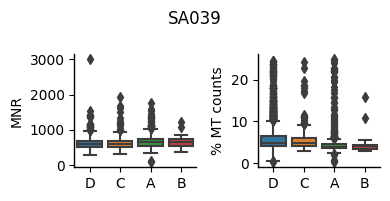

In [184]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SA039-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SA039-ALL"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clone_id", y="pct_counts_mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])
    
fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

# SA1035

In [185]:
patient = "SA1035"

resdir = pl.Path(f"/add/path/here/sigs_june2022/scRNA/count_matrices/{patient}")

plot_df = []
for sample in tqdm(resdir.iterdir()):
    if sample.stem==".DS_Store":
        continue
    counts = sc.read_10x_mtx(sample)

    counts.obs_names = sample.stem + "_" + counts.obs_names

    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    counts.var["mt"] = counts.var_names.str.startswith("MT-")
    # ribosomal genes
    counts.var["ribo"] = counts.var_names.str.startswith(("RPS", "RPL"))

    sc.pp.calculate_qc_metrics(
        counts, qc_vars=["mt", "ribo"], inplace=True, log1p=True
    )
    
    common = scrna_clone_labels.index.intersection(counts.obs_names)
    plot_df_pat = pd.concat([counts.obs.loc[common,["pct_counts_mt"]],scrna_clone_labels.loc[common]],axis=1)
    
    plot_df.append(plot_df_pat)

0it [00:00, ?it/s]

In [186]:
plot_df = pd.concat(plot_df)

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/3292324805.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SA1035U-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index


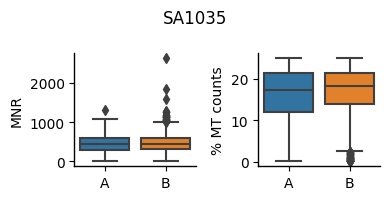

In [187]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SA1035U-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SA1035U-ALL"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clone_id", y="pct_counts_mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])
    
fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

# SA1052

In [188]:
patient = "SA1052"

resdir = pl.Path(f"/add/path/here/sigs_june2022/scRNA/count_matrices/{patient}")

plot_df = []
for sample in tqdm(resdir.iterdir()):
    if sample.stem==".DS_Store":
        continue
    counts = sc.read_10x_mtx(sample)

    counts.obs_names = sample.stem + "_" + counts.obs_names

    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    counts.var["mt"] = counts.var_names.str.startswith("MT-")
    # ribosomal genes
    counts.var["ribo"] = counts.var_names.str.startswith(("RPS", "RPL"))

    sc.pp.calculate_qc_metrics(
        counts, qc_vars=["mt", "ribo"], inplace=True, log1p=True
    )
    
    common = scrna_clone_labels.index.intersection(counts.obs_names)
    plot_df_pat = pd.concat([counts.obs.loc[common,["pct_counts_mt"]],scrna_clone_labels.loc[common]],axis=1)
    
    plot_df.append(plot_df_pat)

0it [00:00, ?it/s]

In [189]:
plot_df = pd.concat(plot_df)

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/303475160.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SA1052-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index


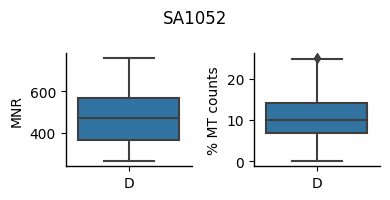

In [190]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SA1052-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SA1052-ALL"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clone_id", y="pct_counts_mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])
    
fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

# SA1054

In [191]:
patient = "SA1054"

resdir = pl.Path(f"/add/path/here/sigs_june2022/scRNA/count_matrices/{patient}")

plot_df = []
for sample in tqdm(resdir.iterdir()):
    if sample.stem==".DS_Store":
        continue
    counts = sc.read_10x_mtx(sample)

    counts.obs_names = sample.stem + "_" + counts.obs_names

    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    counts.var["mt"] = counts.var_names.str.startswith("MT-")
    # ribosomal genes
    counts.var["ribo"] = counts.var_names.str.startswith(("RPS", "RPL"))

    sc.pp.calculate_qc_metrics(
        counts, qc_vars=["mt", "ribo"], inplace=True, log1p=True
    )
    
    common = scrna_clone_labels.index.intersection(counts.obs_names)
    plot_df_pat = pd.concat([counts.obs.loc[common,["pct_counts_mt"]],scrna_clone_labels.loc[common]],axis=1)
    
    plot_df.append(plot_df_pat)

0it [00:00, ?it/s]

In [192]:
plot_df = pd.concat(plot_df)

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/3588080792.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SA1054-A95632A"].groupby("treealign_id").median()["MNR"].sort_values().index


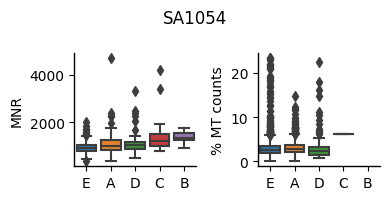

In [193]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SA1054-A95632A"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SA1054-A95632A"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clone_id", y="pct_counts_mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])
    
fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

# SA1055

In [194]:
patient = "SA1055"

resdir = pl.Path(f"/add/path/here/sigs_june2022/scRNA/count_matrices/{patient}")

plot_df = []
for sample in tqdm(resdir.iterdir()):
    if sample.stem==".DS_Store":
        continue
    counts = sc.read_10x_mtx(sample)

    counts.obs_names = sample.stem + "_" + counts.obs_names

    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    counts.var["mt"] = counts.var_names.str.startswith("MT-")
    # ribosomal genes
    counts.var["ribo"] = counts.var_names.str.startswith(("RPS", "RPL"))

    sc.pp.calculate_qc_metrics(
        counts, qc_vars=["mt", "ribo"], inplace=True, log1p=True
    )
    
    common = scrna_clone_labels.index.intersection(counts.obs_names)
    plot_df_pat = pd.concat([counts.obs.loc[common,["pct_counts_mt"]],scrna_clone_labels.loc[common]],axis=1)
    
    plot_df.append(plot_df_pat)

0it [00:00, ?it/s]

In [195]:
plot_df = pd.concat(plot_df)

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/518279278.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SA1055-A95621A"].groupby("treealign_id").median()["MNR"].sort_values().index


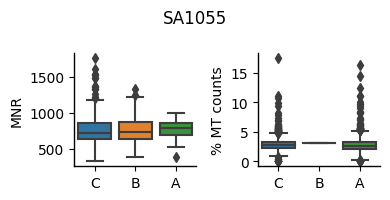

In [196]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SA1055-A95621A"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SA1055-A95621A"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clone_id", y="pct_counts_mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])

fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

# SA1056

In [197]:
patient = "SA1056"

resdir = pl.Path(f"/add/path/here/sigs_june2022/scRNA/count_matrices/{patient}")

plot_df = []
for sample in tqdm(resdir.iterdir()):
    if sample.stem==".DS_Store":
        continue
    counts = sc.read_10x_mtx(sample)

    counts.obs_names = sample.stem + "_" + counts.obs_names

    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    counts.var["mt"] = counts.var_names.str.startswith("MT-")
    # ribosomal genes
    counts.var["ribo"] = counts.var_names.str.startswith(("RPS", "RPL"))

    sc.pp.calculate_qc_metrics(
        counts, qc_vars=["mt", "ribo"], inplace=True, log1p=True
    )
    
    common = scrna_clone_labels.index.intersection(counts.obs_names)
    plot_df_pat = pd.concat([counts.obs.loc[common,["pct_counts_mt"]],scrna_clone_labels.loc[common]],axis=1)
    
    plot_df.append(plot_df_pat)

0it [00:00, ?it/s]

In [198]:
plot_df = pd.concat(plot_df)

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/1938737471.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SA1056-A95635A"].groupby("treealign_id").median()["MNR"].sort_values().index


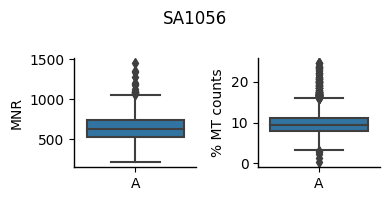

In [199]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SA1056-A95635A"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SA1056-A95635A"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clone_id", y="pct_counts_mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])

fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

# SA1188

In [200]:
patient = "SA1188"

resdir = pl.Path(f"/add/path/here/sigs_june2022/scRNA/count_matrices/{patient}")

plot_df = []
for sample in tqdm(resdir.iterdir()):
    if sample.stem==".DS_Store":
        continue
    counts = sc.read_10x_mtx(sample)

    counts.obs_names = sample.stem + "_" + counts.obs_names

    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    counts.var["mt"] = counts.var_names.str.startswith("MT-")
    # ribosomal genes
    counts.var["ribo"] = counts.var_names.str.startswith(("RPS", "RPL"))

    sc.pp.calculate_qc_metrics(
        counts, qc_vars=["mt", "ribo"], inplace=True, log1p=True
    )
    
    common = scrna_clone_labels.index.intersection(counts.obs_names)
    plot_df_pat = pd.concat([counts.obs.loc[common,["pct_counts_mt"]],scrna_clone_labels.loc[common]],axis=1)
    
    plot_df.append(plot_df_pat)

0it [00:00, ?it/s]

In [201]:
plot_df = pd.concat(plot_df)

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/4096095976.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SA1188-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index


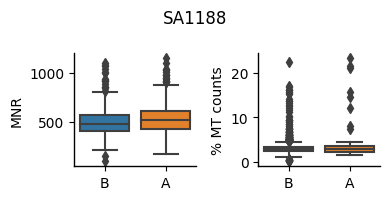

In [202]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SA1188-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SA1188-ALL"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clone_id", y="pct_counts_mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])

fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

# SA535

In [169]:
patient = "SA535"

resdir = pl.Path(f"/add/path/here/sigs_june2022/scRNA/count_matrices/{patient}")

plot_df = []
for sample in tqdm(resdir.iterdir()):
    if sample.stem==".DS_Store":
        continue
    counts = sc.read_10x_mtx(sample)

    counts.obs_names = sample.stem + "_" + counts.obs_names

    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    counts.var["mt"] = counts.var_names.str.startswith("MT-")
    # ribosomal genes
    counts.var["ribo"] = counts.var_names.str.startswith(("RPS", "RPL"))

    sc.pp.calculate_qc_metrics(
        counts, qc_vars=["mt", "ribo"], inplace=True, log1p=True
    )
    
    common = scrna_clone_labels.index.intersection(counts.obs_names)
    plot_df_pat = pd.concat([counts.obs.loc[common,["pct_counts_mt"]],scrna_clone_labels.loc[common]],axis=1)
    
    plot_df.append(plot_df_pat)

0it [00:00, ?it/s]

In [170]:
plot_df = pd.concat(plot_df)

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/2276057531.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SA535U-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index


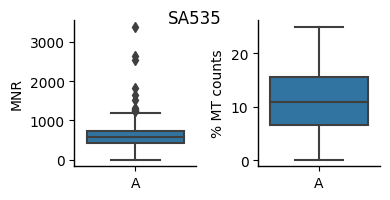

In [178]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SA535U-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SA535U-ALL"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clone_id", y="pct_counts_mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])

fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

# SA604

In [203]:
patient = "SA604"

resdir = pl.Path(f"/add/path/here/sigs_june2022/scRNA/count_matrices/{patient}")

plot_df = []
for sample in tqdm(resdir.iterdir()):
    if sample.stem==".DS_Store":
        continue
    counts = sc.read_10x_mtx(sample)

    counts.obs_names = sample.stem + "_" + counts.obs_names

    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    counts.var["mt"] = counts.var_names.str.startswith("MT-")
    # ribosomal genes
    counts.var["ribo"] = counts.var_names.str.startswith(("RPS", "RPL"))

    sc.pp.calculate_qc_metrics(
        counts, qc_vars=["mt", "ribo"], inplace=True, log1p=True
    )
    
    common = scrna_clone_labels.index.intersection(counts.obs_names)
    plot_df_pat = pd.concat([counts.obs.loc[common,["pct_counts_mt"]],scrna_clone_labels.loc[common]],axis=1)
    
    plot_df.append(plot_df_pat)

0it [00:00, ?it/s]

In [204]:
plot_df = pd.concat(plot_df)

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/1520034267.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SA604-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index


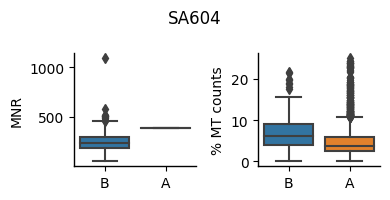

In [205]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SA604-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SA604-ALL"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clone_id", y="pct_counts_mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])

fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

# SA605

In [206]:
patient = "SA605"

resdir = pl.Path(f"/add/path/here/sigs_june2022/scRNA/count_matrices/{patient}")

plot_df = []
for sample in tqdm(resdir.iterdir()):
    if sample.stem==".DS_Store":
        continue
    counts = sc.read_10x_mtx(sample)

    counts.obs_names = sample.stem + "_" + counts.obs_names

    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    counts.var["mt"] = counts.var_names.str.startswith("MT-")
    # ribosomal genes
    counts.var["ribo"] = counts.var_names.str.startswith(("RPS", "RPL"))

    sc.pp.calculate_qc_metrics(
        counts, qc_vars=["mt", "ribo"], inplace=True, log1p=True
    )
    
    common = scrna_clone_labels.index.intersection(counts.obs_names)
    plot_df_pat = pd.concat([counts.obs.loc[common,["pct_counts_mt"]],scrna_clone_labels.loc[common]],axis=1)
    
    plot_df.append(plot_df_pat)

0it [00:00, ?it/s]

In [207]:
plot_df = pd.concat(plot_df)

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/1294616765.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SA605-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index


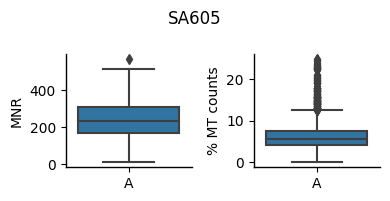

In [208]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SA605-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SA605-ALL"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clone_id", y="pct_counts_mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])

fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

# SA609

In [209]:
patient = "SA609"

resdir = pl.Path(f"/add/path/here/sigs_june2022/scRNA/count_matrices/{patient}")

plot_df = []
for sample in tqdm(resdir.iterdir()):
    if sample.stem==".DS_Store":
        continue
    counts = sc.read_10x_mtx(sample)

    counts.obs_names = sample.stem + "_" + counts.obs_names

    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    counts.var["mt"] = counts.var_names.str.startswith("MT-")
    # ribosomal genes
    counts.var["ribo"] = counts.var_names.str.startswith(("RPS", "RPL"))

    sc.pp.calculate_qc_metrics(
        counts, qc_vars=["mt", "ribo"], inplace=True, log1p=True
    )
    
    common = scrna_clone_labels.index.intersection(counts.obs_names)
    plot_df_pat = pd.concat([counts.obs.loc[common,["pct_counts_mt"]],scrna_clone_labels.loc[common]],axis=1)
    
    plot_df.append(plot_df_pat)

0it [00:00, ?it/s]

In [210]:
plot_df = pd.concat(plot_df)

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/646292302.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SA609U-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index


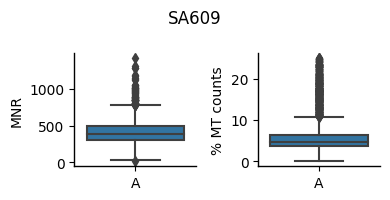

In [211]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SA609U-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SA609U-ALL"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clone_id", y="pct_counts_mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])

fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

# SA610

In [212]:
patient = "SA610"

resdir = pl.Path(f"/add/path/here/sigs_june2022/scRNA/count_matrices/{patient}")

plot_df = []
for sample in tqdm(resdir.iterdir()):
    if sample.stem==".DS_Store":
        continue
    counts = sc.read_10x_mtx(sample)

    counts.obs_names = sample.stem + "_" + counts.obs_names

    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    counts.var["mt"] = counts.var_names.str.startswith("MT-")
    # ribosomal genes
    counts.var["ribo"] = counts.var_names.str.startswith(("RPS", "RPL"))

    sc.pp.calculate_qc_metrics(
        counts, qc_vars=["mt", "ribo"], inplace=True, log1p=True
    )
    
    common = scrna_clone_labels.index.intersection(counts.obs_names)
    plot_df_pat = pd.concat([counts.obs.loc[common,["pct_counts_mt"]],scrna_clone_labels.loc[common]],axis=1)
    
    plot_df.append(plot_df_pat)

0it [00:00, ?it/s]

In [213]:
plot_df = pd.concat(plot_df)

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/3611786463.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SA610-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index


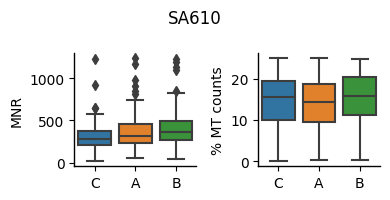

In [214]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SA610-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SA610-ALL"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clone_id", y="pct_counts_mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])

fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

# SA906a

In [215]:
patient = "SA906a"

resdir = pl.Path(f"/add/path/here/sigs_june2022/scRNA/count_matrices/{patient}")

plot_df = []
for sample in tqdm(resdir.iterdir()):
    if sample.stem==".DS_Store":
        continue
    counts = sc.read_10x_mtx(sample)

    counts.obs_names = sample.stem + "_" + counts.obs_names

    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    counts.var["mt"] = counts.var_names.str.startswith("MT-")
    # ribosomal genes
    counts.var["ribo"] = counts.var_names.str.startswith(("RPS", "RPL"))

    sc.pp.calculate_qc_metrics(
        counts, qc_vars=["mt", "ribo"], inplace=True, log1p=True
    )
    
    common = scrna_clone_labels.index.intersection(counts.obs_names)
    plot_df_pat = pd.concat([counts.obs.loc[common,["pct_counts_mt"]],scrna_clone_labels.loc[common]],axis=1)
    
    plot_df.append(plot_df_pat)

0it [00:00, ?it/s]

In [216]:
plot_df = pd.concat(plot_df)

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/847776125.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SA906a-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index


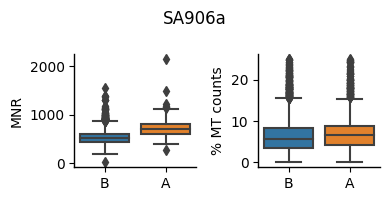

In [217]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SA906a-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SA906a-ALL"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clone_id", y="pct_counts_mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])

fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

# SA906b

In [179]:
patient = "SA906b"

resdir = pl.Path(f"/add/path/here/sigs_june2022/scRNA/count_matrices/{patient}")

plot_df = []
for sample in tqdm(resdir.iterdir()):
    if sample.stem==".DS_Store":
        continue
    counts = sc.read_10x_mtx(sample)

    counts.obs_names = sample.stem + "_" + counts.obs_names

    # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    counts.var["mt"] = counts.var_names.str.startswith("MT-")
    # ribosomal genes
    counts.var["ribo"] = counts.var_names.str.startswith(("RPS", "RPL"))

    sc.pp.calculate_qc_metrics(
        counts, qc_vars=["mt", "ribo"], inplace=True, log1p=True
    )
    
    common = scrna_clone_labels.index.intersection(counts.obs_names)
    plot_df_pat = pd.concat([counts.obs.loc[common,["pct_counts_mt"]],scrna_clone_labels.loc[common]],axis=1)
    
    plot_df.append(plot_df_pat)

0it [00:00, ?it/s]

In [180]:
plot_df = pd.concat(plot_df)

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/3498055822.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SA906b-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index


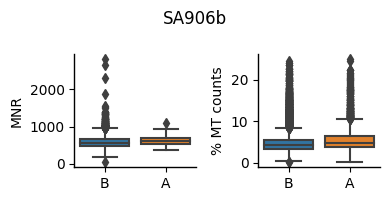

In [181]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SA906b-ALL"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SA906b-ALL"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clone_id", y="pct_counts_mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])
    
fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

In [219]:
scrna_meta = pd.read_csv("/add/path/here/GSE180661_GEO_cells.tsv.gz",sep="\t").set_index("cell_id")

# SPECTRUM-OV-022

In [226]:
patient = "SPECTRUM-OV-022"

In [227]:
plot_df = pd.read_csv("/add/path/here/10498240/OV022_scRNA.tsv",sep="\t").set_index("cell_id")

plot_df = pd.concat([plot_df, scrna_meta],axis=1, join="inner")

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/2840198253.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SPECTRUM-OV-022"].groupby("treealign_id").median()["MNR"].sort_values().index


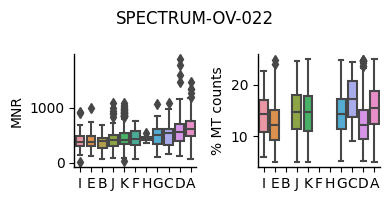

In [231]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SPECTRUM-OV-022"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SPECTRUM-OV-022"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clonealign_id", y="percent.mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])
    
fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')

# SPECTRUM-OV-081

In [232]:
patient = "SPECTRUM-OV-081"

In [233]:
plot_df = pd.read_csv("/add/path/here/10498240/OV081_scRNA.tsv",sep="\t").set_index("cell_id")

plot_df = pd.concat([plot_df, scrna_meta],axis=1, join="inner")

/var/folders/y0/0jmz5bl96kb57fmb09fl6fdw0000gn/T/ipykernel_88386/1052996324.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = meta[meta["suplibrary"]=="SPECTRUM-OV-081"].groupby("treealign_id").median()["MNR"].sort_values().index


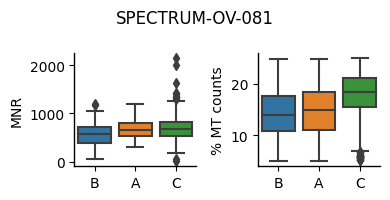

In [234]:
fig, ax = plt.subplots(1,2,figsize=(4,2))

order = meta[meta["suplibrary"]=="SPECTRUM-OV-081"].groupby("treealign_id").median()["MNR"].sort_values().index

sns.boxplot(data=meta[meta["suplibrary"]=="SPECTRUM-OV-081"], x="treealign_id", y="MNR",ax=ax[0], order=order)
ax[0].set_xlabel("")
sns.boxplot(data=plot_df, x="clonealign_id", y="percent.mt",ax=ax[1], order=order)
ax[1].set_xlabel("")
ax[1].set_ylabel("% MT counts")

for i in range(len(ax)):
    pretty_ax(ax[i])
    
fig.suptitle(patient)
fig.tight_layout()
fig.savefig(f"/add/path/here/figures/mtdna_to_pct/{patient}.svg", dpi=200, bbox_inches='tight')